In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve, accuracy_score
)
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("cleaned.csv", header=0)

df = df.drop(['Purpose_retraining', 'Credit History_no credits/all paid', 'Housing_rent', 'Other installment plans_stores', 'Property_unknown'], axis=1)

pd.options.display.max_columns = None

df            

,Checking Acc Status,Duration(months),Credit Amount,Savings,Present employment since,Installment rate,Gurantors,Present residence since,Age(Years),Number of existing credits at this bank,Job,People Maintainance,Telephone,foreign worker,Loan Quality,Gender,Marital_Status,Property_car/other,Property_life insurance/building society,Property_real estate,Other installment plans_bank,Other installment plans_none,Housing_for free,Housing_own,Credit History_all credits paid (this bank),Credit History_credits paid till now,Credit History_critical/other credits,Credit History_delay in past,Purpose_business,Purpose_car (new),Purpose_car (used),Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_others,Purpose_radio/television,Purpose_repairs
0,0.0,6,1169,4.0,4.0,4,0,4,67,2,2.0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1.0,48,5951,0.0,2.0,2,0,2,22,1,2.0,1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,3.0,12,2096,0.0,3.0,2,0,3,49,1,1.0,2,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0.0,42,7882,0.0,3.0,2,1,4,45,1,2.0,2,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0.0,24,4870,0.0,2.0,3,0,4,53,2,2.0,2,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,12,1736,0.0,3.0,3,0,4,31,1,1.0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
996,0.0,30,3857,0.0,2.0,4,0,4,40,1,3.0,1,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
997,3.0,12,804,0.0,4.0,4,0,4,38,1,2.0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
998,0.0,45,1845,0.0,2.0,4,0,4,23,1,2.0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [4]:
numerical_cols = ['Duration(months)', 'Credit Amount', 'Age(Years)', 'Installment rate', 
                  'Present residence since', 'Number of existing credits at this bank', 
                  'People Maintainance'] 

scaler = StandardScaler()

# Fit and transform
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [5]:
df

,Checking Acc Status,Duration(months),Credit Amount,Savings,Present employment since,Installment rate,Gurantors,Present residence since,Age(Years),Number of existing credits at this bank,Job,People Maintainance,Telephone,foreign worker,Loan Quality,Gender,Marital_Status,Property_car/other,Property_life insurance/building society,Property_real estate,Other installment plans_bank,Other installment plans_none,Housing_for free,Housing_own,Credit History_all credits paid (this bank),Credit History_credits paid till now,Credit History_critical/other credits,Credit History_delay in past,Purpose_business,Purpose_car (new),Purpose_car (used),Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_others,Purpose_radio/television,Purpose_repairs
0,0.0,-1.236478,-0.745131,4.0,4.0,0.918477,0,1.046987,2.766456,1.027079,2.0,-0.428290,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1.0,2.248194,0.949817,0.0,2.0,-0.870183,0,-0.765977,-1.191404,-0.704926,2.0,-0.428290,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,3.0,-0.738668,-0.416562,0.0,3.0,-0.870183,0,0.140505,1.183312,-0.704926,1.0,2.334869,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0.0,1.750384,1.634247,0.0,3.0,-0.870183,1,1.046987,0.831502,-0.704926,2.0,2.334869,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0.0,0.256953,0.566664,0.0,2.0,0.024147,0,1.046987,1.535122,1.027079,2.0,2.334869,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,-0.738668,-0.544162,0.0,3.0,0.024147,0,1.046987,-0.399832,-0.704926,1.0,-0.428290,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
996,0.0,0.754763,0.207612,0.0,2.0,0.918477,0,1.046987,0.391740,-0.704926,3.0,-0.428290,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
997,3.0,-0.738668,-0.874503,0.0,4.0,0.918477,0,1.046987,0.215835,-0.704926,2.0,-0.428290,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
998,0.0,1.999289,-0.505528,0.0,2.0,0.918477,0,1.046987,-1.103451,-0.704926,2.0,-0.428290,1,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [6]:
X = df.drop('Loan Quality', axis=1)  # replace with your actual target column name
y = df['Loan Quality'] 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [8]:
ratio = (y_train == 0).sum() / (y_train == 1).sum()

In [9]:
ratio

2.3333333333333335

In [10]:
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=ratio,        # only if classes are imbalanced
    random_state=42
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [11]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # probability of class 1 (bad loan)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7266666666666667
ROC AUC: 0.7797883597883599
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       210
           1       0.55      0.51      0.53        90

    accuracy                           0.73       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.72      0.73      0.72       300

Confusion Matrix:
 [[172  38]
 [ 44  46]]


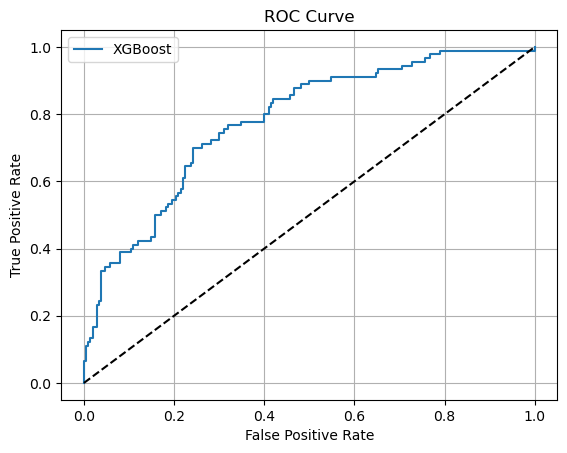

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

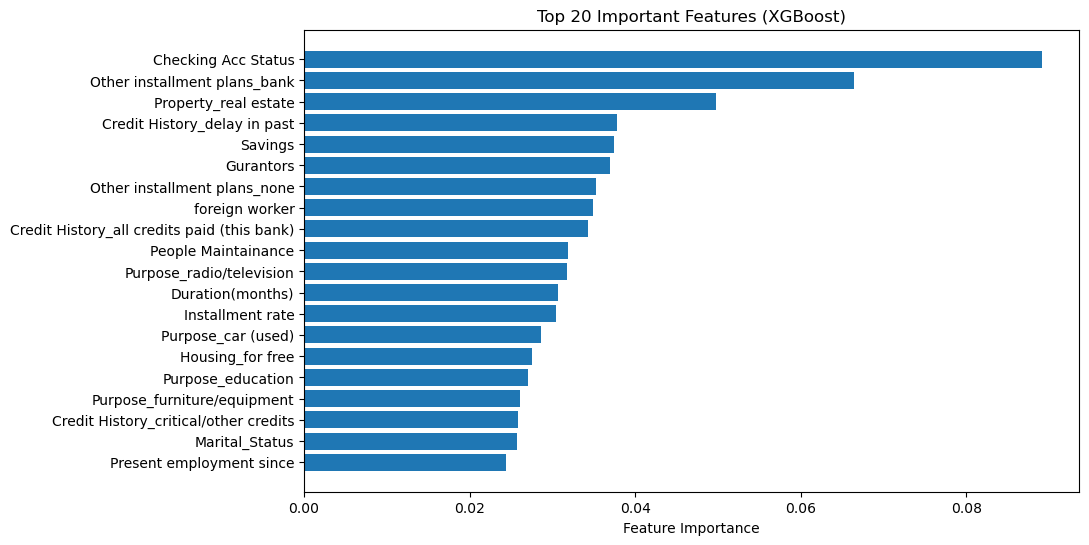

In [13]:
import matplotlib.pyplot as plt

# Plot top 20 features
importances = model.feature_importances_
feat_names = X.columns
top_idx = np.argsort(importances)[-20:]

plt.figure(figsize=(10, 6))
plt.barh(feat_names[top_idx], importances[top_idx])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features (XGBoost)")
plt.show()

# Hypertuning

In [17]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', eval_metric='auc'),
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           monotone_constraints=None,
                         

In [18]:
random_search.best_params_

{'subsample': 1.0,
 'n_estimators': 100,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 1,
 'colsample_bytree': 0.6}

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [75, 100, 125],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.03, 0.05, 0.07]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', eval_metric='auc'),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [21]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
final_model = grid_search.best_estimator_

In [23]:
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7566666666666667
ROC AUC: 0.787883597883598
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.84       210
           1       0.63      0.47      0.54        90

    accuracy                           0.76       300
   macro avg       0.71      0.67      0.69       300
weighted avg       0.74      0.76      0.75       300

Confusion Matrix:
 [[185  25]
 [ 48  42]]


In [25]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(final_model, X, y, cv=5, scoring='roc_auc')
print("Mean CV ROC AUC:", cv_score.mean())

Mean CV ROC AUC: 0.7930952380952382


# Fairness Eval

In [14]:
sensitive_attr = 'Gender'

In [15]:
X_test #checking if Gender Present

,Checking Acc Status,Duration(months),Credit Amount,Savings,Present employment since,Installment rate,Gurantors,Present residence since,Age(Years),Number of existing credits at this bank,Job,People Maintainance,Telephone,foreign worker,Gender,Marital_Status,Property_car/other,Property_life insurance/building society,Property_real estate,Other installment plans_bank,Other installment plans_none,Housing_for free,Housing_own,Credit History_all credits paid (this bank),Credit History_credits paid till now,Credit History_critical/other credits,Credit History_delay in past,Purpose_business,Purpose_car (new),Purpose_car (used),Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_others,Purpose_radio/television,Purpose_repairs
115,3.0,2.248194,0.108723,4.0,4.0,0.918477,0,-1.672459,1.007407,-0.704926,2.0,-0.42829,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
346,1.0,-0.655699,-0.846857,0.0,1.0,0.918477,1,1.046987,-1.103451,1.027079,2.0,-0.42829,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
328,2.0,1.252574,0.425949,0.0,4.0,0.918477,0,-0.765977,-0.399832,-0.704926,2.0,-0.42829,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
974,3.0,0.754763,-0.156047,0.0,2.0,0.918477,0,-0.765977,-0.223927,-0.704926,2.0,-0.42829,1,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
587,0.0,-0.738668,-0.702598,0.0,2.0,0.918477,1,-1.672459,-1.279356,-0.704926,1.0,-0.42829,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,1.0,-1.236478,-0.730954,0.0,0.0,0.918477,0,1.046987,1.007407,-0.704926,3.0,-0.42829,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
647,3.0,-0.738668,-0.668217,2.0,2.0,-0.870183,0,-0.765977,-0.839594,-0.704926,2.0,-0.42829,0,1,1,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
860,3.0,0.256953,0.897714,3.0,2.0,0.918477,0,-0.765977,-0.751642,1.027079,2.0,-0.42829,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
433,3.0,0.256953,-0.430031,0.0,2.0,0.918477,0,-0.765977,-0.223927,1.027079,2.0,-0.42829,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1


In [16]:
import numpy as np

def fairness_evaluation(y_true, y_pred, sensitive_attr, group_labels=(0, 1)):
    group0, group1 = group_labels

    # Group masks
    mask0 = (sensitive_attr == group0)
    mask1 = (sensitive_attr == group1)

    # Extract group-specific actual and predicted
    y_true_0 = y_true[mask0]
    y_pred_0 = y_pred[mask0]

    y_true_1 = y_true[mask1]
    y_pred_1 = y_pred[mask1]

    # Function to compute TPR, FPR, PosRate
    def metrics(y_true_g, y_pred_g):
        TP = np.sum((y_true_g == 1) & (y_pred_g == 1))
        FN = np.sum((y_true_g == 1) & (y_pred_g == 0))
        FP = np.sum((y_true_g == 0) & (y_pred_g == 1))
        TN = np.sum((y_true_g == 0) & (y_pred_g == 0))
        total = len(y_true_g)

        tpr = TP / (TP + FN) if (TP + FN) > 0 else 0.0
        fpr = FP / (FP + TN) if (FP + TN) > 0 else 0.0
        pos_rate = (TP + FP) / total if total > 0 else 0.0

        return tpr, fpr, pos_rate

    # Compute metrics
    tpr_0, fpr_0, pos_0 = metrics(y_true_0, y_pred_0)
    tpr_1, fpr_1, pos_1 = metrics(y_true_1, y_pred_1)

    # Display results
    print(f"Group {group0}: TPR={tpr_0:.3f}, FPR={fpr_0:.3f}, PosRate={pos_0:.3f}")
    print(f"Group {group1}: TPR={tpr_1:.3f}, FPR={fpr_1:.3f}, PosRate={pos_1:.3f}")

    print("\nDisparities (Group1 - Group0):")
    print(f"TPR Gap: {tpr_1 - tpr_0:.3f}")
    print(f"FPR Gap: {fpr_1 - fpr_0:.3f}")
    print(f"PosRate Gap: {pos_1 - pos_0:.3f}")


In [17]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Run fairness check
fairness_evaluation(y_test, y_pred, X_test['Gender'], group_labels=(0, 1))

Group 0: TPR=0.509, FPR=0.167, PosRate=0.261
Group 1: TPR=0.514, FPR=0.212, PosRate=0.317

Disparities (Group1 - Group0):
TPR Gap: 0.005
FPR Gap: 0.045
PosRate Gap: 0.056


# Fairlearn

In [18]:
pip install fairlearn

  Using cached fairlearn-0.12.0-py3-none-any.whl (240 kB)
  Using cached pandas-2.3.1-cp39-cp39-macosx_10_9_x86_64.whl (11.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 863.2 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.1
    Uninstalling scipy-1.9.1:
      Successfully uninstalled scipy-1.9.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit

In [19]:
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.metrics import MetricFrame, selection_rate, true_positive_rate, false_positive_rate
from sklearn.metrics import accuracy_score, roc_auc_score

In [20]:
y_probs = model.predict_proba(X_test)[:, 1] 

postprocess_est = ThresholdOptimizer(
    estimator=model,
    constraints="equalized_odds",       
    prefit=True,                        
    predict_method="predict_proba"
)

# Step 3: Fit on test data
postprocess_est.fit(X_test, y_test, sensitive_features=X_test["Gender"])

ThresholdOptimizer(constraints='equalized_odds',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_th

In [21]:
y_pred_fair = postprocess_est.predict(X_test, sensitive_features=X_test["Gender"])

In [22]:
metrics = {
    'accuracy': accuracy_score,
    'roc_auc': roc_auc_score,
    'selection_rate': selection_rate,
    'true_positive_rate': true_positive_rate,
    'false_positive_rate': false_positive_rate
}

metric_frame = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=y_pred_fair,
    sensitive_features=X_test["Gender"]
)

print(metric_frame.by_group)
print("\nDisparities:\n", metric_frame.difference())

        accuracy  roc_auc  selection_rate  true_positive_rate  \
Gender                                                          
0       0.773869  0.63024        0.120603            0.309091   
1       0.722772  0.62684        0.148515            0.314286   

        false_positive_rate  
Gender                       
0                  0.048611  
1                  0.060606  

Disparities:
 accuracy               0.051097
roc_auc                0.003400
selection_rate         0.027912
true_positive_rate     0.005195
false_positive_rate    0.011995
dtype: float64


In [31]:
mf_before = MetricFrame(metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=X_test['Gender'])

# After: MetricFrame on fairlearn model
mf_after = MetricFrame(metrics=metrics, y_true=y_test, y_pred=y_pred_fair, sensitive_features=X_test['Gender'])

# Compare disparities
disparity_before = mf_before.difference().abs()
disparity_after = mf_after.difference().abs()

fairness_improvement = (disparity_before - disparity_after).round(4)

print("Fairness Improvement per Metric:")
print(fairness_improvement)

Fairness Improvement per Metric:
accuracy              -0.0004
roc_auc                0.0167
selection_rate         0.0276
true_positive_rate     0.0000
false_positive_rate    0.0335
dtype: float64
